In [9]:
import ee
import geemap
from geemap import cartoee
import cartopy.crs as ccrs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
geemap.ee_initialize()

Plotting an image on a map¶
Here we are going to show another example of creating a map with EE results. We will use global sea surface temperature data for Jan-Mar 2018.

In [11]:
# get an earth engine image of ocean data for Jan-Mar 2018
ocean = (
    ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    .filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    .median()
    .select(["sst"], ["SST"])
)

In [12]:
# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands':"SST", 'min':-2, 'max':30}
# specify region to focus on
bbox = [-180, -88, 180, 88]

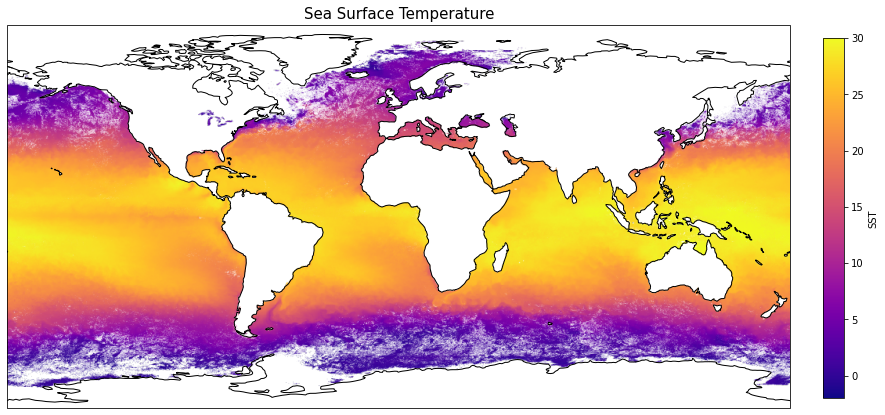

In [13]:
fig = plt.figure(figsize=(15,10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(ocean, cmap='plasma', vis_params=visualization, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')

ax.set_title(label = 'Sea Surface Temperature', fontsize = 15)

ax.coastlines()
plt.show()

Mapping with different projections¶
You can specify what ever projection is available within cartopy to display the results from Earth Engine. Here are a couple examples of global and regions maps using the sea surface temperature example. Please refer to the cartopy projection documentation for more examples with different projections.

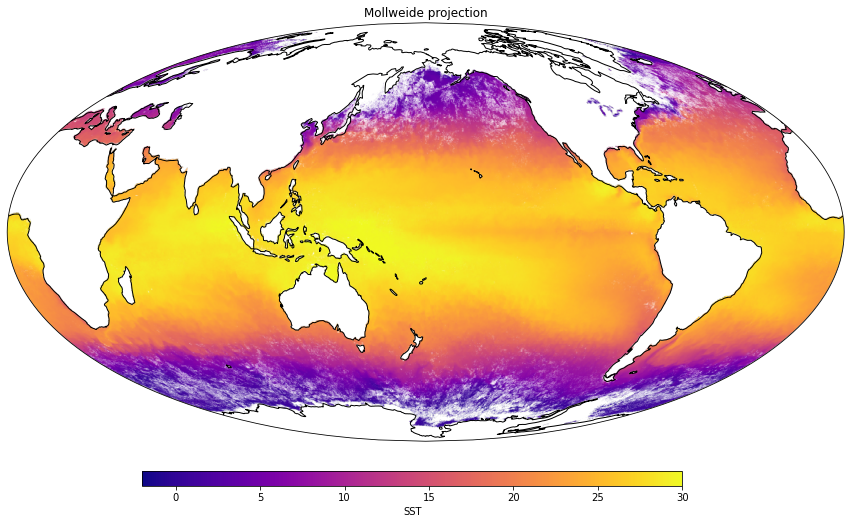

In [14]:
fig = plt.figure(figsize=(15,10))

# create a new Mollweide projection centered on the Pacific
projection = ccrs.Mollweide(central_longitude=-180)

# plot the result with cartoee using the Mollweide projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax,vis_params=visualization, loc='bottom', cmap='plasma',
                    orientation='horizontal')

ax.set_title("Mollweide projection")

ax.coastlines()
plt.show()

AttributeError: 'GeoAxesSubplot' object has no attribute 'coastline'

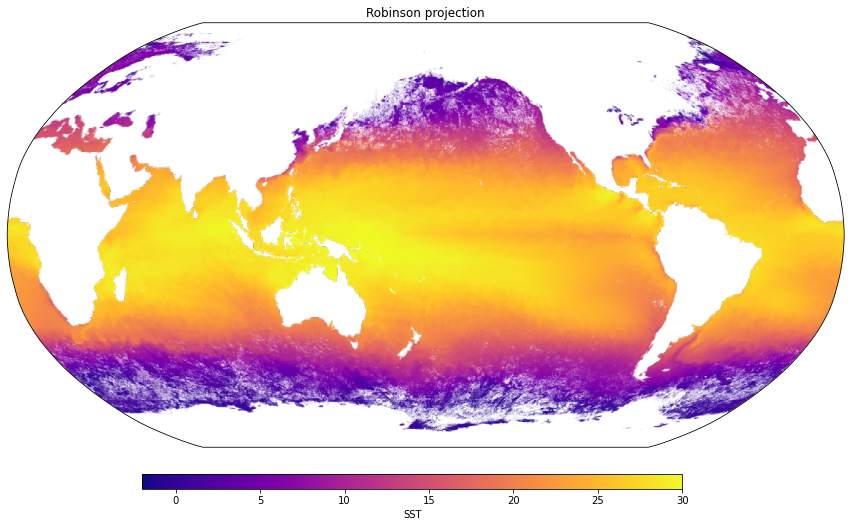

In [15]:
fig = plt.figure(figsize=(15,10))

# create a new Goode homolosine projection centered on the Pacific
projection = ccrs.Robinson(central_longitude=-180)

# plot the result with cartoee using the Goode homolosine projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='bottom', cmap='plasma',
                    orientation='horizontal')

ax.set_title("Robinson projection")

ax.coastline

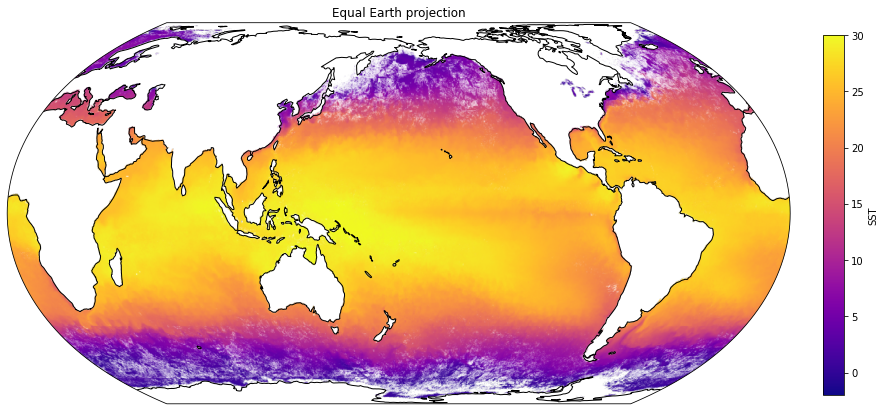

In [16]:
fig = plt.figure(figsize=(15,10))

# create a new orographic projection focused on the Pacific
projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma',
                    orientation='vertical')

ax.set_title("Equal Earth projection")

ax.coastlines()
plt.show()

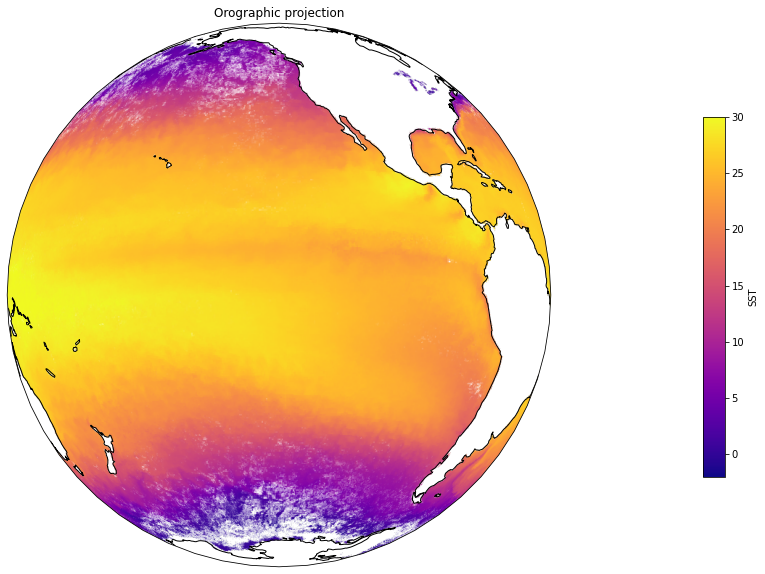

In [17]:
fig = plt.figure(figsize=(15,10))

# create a new orographic projection focused on the Pacific
projection = ccrs.Orthographic(-130,-10)

# plot the result with cartoee using the orographic projection
ax = cartoee.get_map(ocean, vis_params=visualization, region=bbox,
                cmap='plasma', proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma',
                    orientation='vertical')

ax.set_title("Orographic projection")

ax.coastlines()
plt.show()

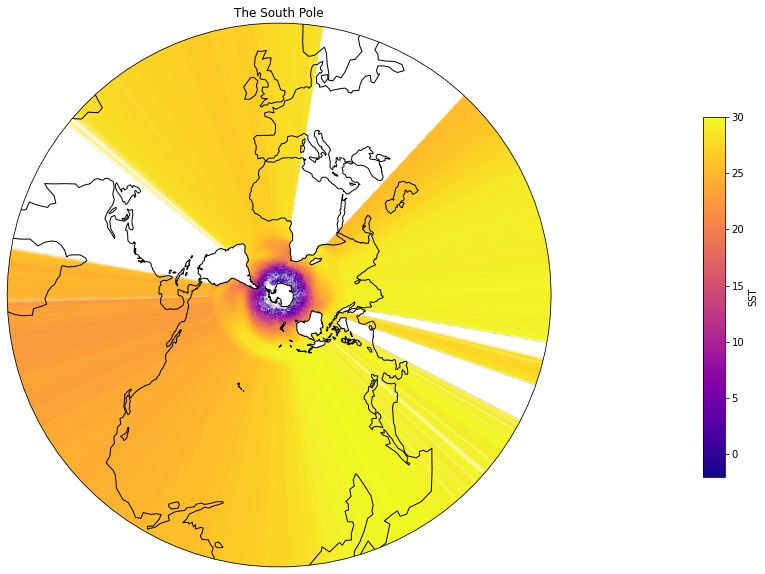

In [18]:
fig = plt.figure(figsize=(15, 10))

# Create a new region to focus on
spole = [-180, -88, 180,0]

projection = ccrs.SouthPolarStereo()

# plot the result with cartoee focusing on the south pole
ax = cartoee.get_map(ocean, cmap='plasma', vis_params=visualization, region=spole, proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')

ax.coastlines()
ax.set_title('The South Pole')
plt.show()

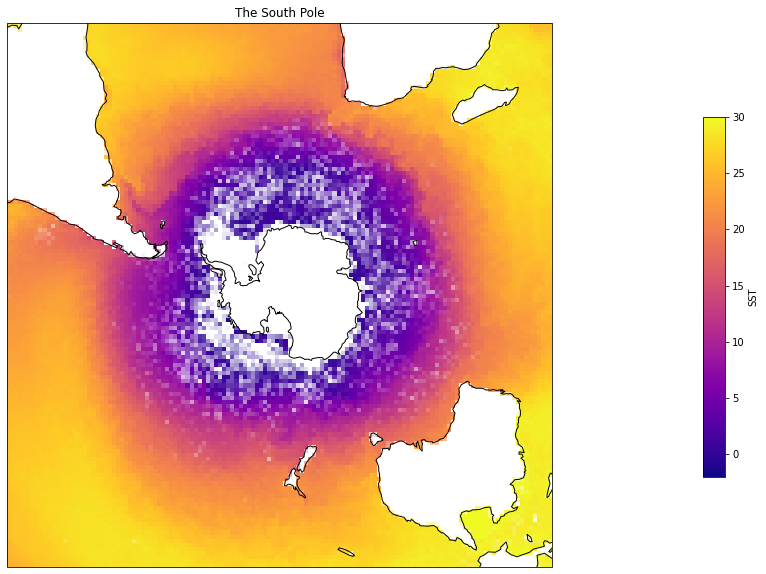

In [19]:
fig = plt.figure(figsize=(15,10))

# plot the result with cartoee focusing on the south pole
ax = cartoee.get_map(ocean, cmap='plasma', vis_params=visualization, region=spole, proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')

ax.coastlines()
ax.set_title('The South Pole')

# get bounding box coordinates of a zoom area
zoom = spole
zoom[-1] = -20

# convert bbox coordinate from [W,S,E,N] to [W,E,S,N] as matplotlib expects
zoom_extent = cartoee.bbox_to_extent(zoom)

# set the extent of the map to the zoom area
ax.set_extent(zoom_extent,ccrs.PlateCarree())

plt.show()

In [21]:
import ee
ee.Initialize()

In [22]:
from ipygee import *

In [23]:

test_site = ee.Geometry.Point([-71, -42])

In [24]:
test_feat = ee.Feature(test_site, {'name': 'test feature', 'buffer':0})

In [25]:
test_featcol = ee.FeatureCollection([
    test_feat, 
    test_feat.buffer(100).set('name', 'buffer 100', 'buffer', 100),
    test_feat.buffer(1000).set('name', 'buffer 1000', 'buffer', 1000)
])

In [26]:
col = ee.ImageCollection('COPERNICUS/S2').filterBounds(test_site)

In [27]:
time_series = col.filterDate('2018-01-01', '2018-04-01')

In [28]:
bands = ['B1', 'B2', 'B3']

In [29]:
chart_ts = chart.Image.series(**{
    'imageCollection': time_series, 
    'region': test_site,
    'scale': 10,
    'bands': bands,
    'label_bands':['band B1', 'B2 band', 'this is B3'],
    'properties':['CLOUD_COVERAGE_ASSESSMENT'],
    'label_properties':['CLOUD_COVER']
})

In [30]:
chart_ts.renderWidget(width='50%')

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [31]:

chart_ts.dataframe

,band B1,B2 band,this is B3,CLOUD_COVER
2018-01-01 14:37:52.570,3622,2749,2673,88.2101
2018-01-06 14:43:00.500,6989,6841,6483,98.1513
2018-01-16 14:38:41.740,1196,1042,1012,0.0646
2018-01-21 14:41:57.890,1232,1070,1035,58.2937
2018-01-26 14:40:02.120,1210,1082,1038,0.2448
2018-02-05 14:36:43.690,1196,1072,1037,0.0204
2018-02-10 14:42:58.290,4730,4153,4290,30.9238
2018-02-15 14:40:26.370,1212,1069,1020,0.0000
2018-02-20 14:33:53.510,1230,1077,1036,0.0121
2018-02-25 14:37:50.240,1234,1091,1019,0.4717


In [32]:
chart_ts_region = chart.Image.seriesByRegion(**{
    'imageCollection': time_series,
    'reducer': ee.Reducer.median(),
    'regions': test_featcol,
    'scale': 10,
    'band': 'B11',
    'seriesProperty': 'name'
})